In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
def frameget(year):
    url = 'http://www.sports-reference.com/cbb/play-index/tourney.cgi?request=1&match=single&year_min={0}&year_max={0}&seed_cmp=eq&opp_seed_cmp=eq&game_result=W&pts_diff_cmp=eq&order_by_single=date_game&order_by_combined=g'.format(year)
    init = pd.read_html(url)
    df = init[0]
    df2 = df['School'].str.split(n=1,expand=True)
    df2.rename(columns={0: 'WinnerSeed', 1: 'WinningTeam'},inplace= True)
    df3 = df['Opponent'].str.split(n=1,expand=True)
    df3.rename(columns={0: 'LoserSeed', 1: 'LosingTeam'},inplace= True)
    df1 = df[['Rk', 'Year', 'Date', 'Region', 'Round', 'PTS', 'PTS.1', 'OT', 'Diff', 'Location']]
    df = df.join(df2,how= 'left')
    df = df.join(df3,how= 'left')
    return df

In [4]:
results = [frameget(y) for y in range(1985,2019)]
results_df = pd.concat(results)
results_df = results_df.loc[results_df['Year']!='Year',]
results_df.Year = results_df.Year.apply(pd.to_numeric)
results_df.drop(results_df[(results_df['Round']=='Opening Round') & ((results_df['Year']>=2001) & (results_df['Year']<=2010))].index ,axis= 0, inplace= True)
results_df.drop(results_df[(results_df['Round']=='First Round') & ((results_df['Year']>=2011) & (results_df['Year']<=2015))].index, axis= 0, inplace= True)
results_df.drop(results_df[(results_df['Round']=='First Four') & (results_df['Year']>=2016)].index, axis= 0, inplace= True)

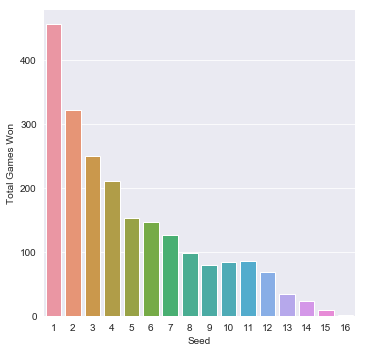

In [5]:
g = sns.catplot(x='WinnerSeed', data=results_df, order = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'], kind='count')
g.set_ylabels('Total Games Won')
g.set_xlabels('Seed')
g.despine(left=True)
g.savefig('ncaabb_totalwins.png')

In [6]:
secondround = results_df[((results_df['Round']=='Second Round') & ((results_df['Year'] <= 2010) | (results_df['Year'] > 2015))) | 
((results_df['Round']=='Third Round') & ((results_df['Year'] >= 2011) & (results_df['Year'] <= 2015)))]

In [7]:
games = secondround[['Year','WinnerSeed','LoserSeed']].melt(id_vars='Year')
games.loc[games['variable'] == 'WinnerSeed','WIN2'] = 1
games['WIN2'].fillna(0,inplace=True)

C:\Users\ptopp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


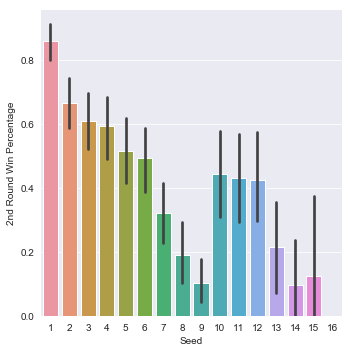

In [8]:
g = sns.catplot(x='value',y='WIN2', data=games, order = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'], kind='bar')
g.set_ylabels('2nd Round Win Percentage')
g.set_xlabels('Seed')
g.despine(left=True)
g.savefig('ncaabb_rd2winpct.png')